In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Challenge 1
# This is a dataset about people who are in the criminal justice system of Broward County, FL.
df = pd.read_csv("compas.csv")

In [3]:
# Challenge 2
# The important column to notice is `decile_score`.
# This is the COMPAS score assigned to a defendant.
# It ranges from 1 - 10, where 10 is considered "extremely likely to commit another crime".
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

<AxesSubplot:xlabel='sex', ylabel='count'>

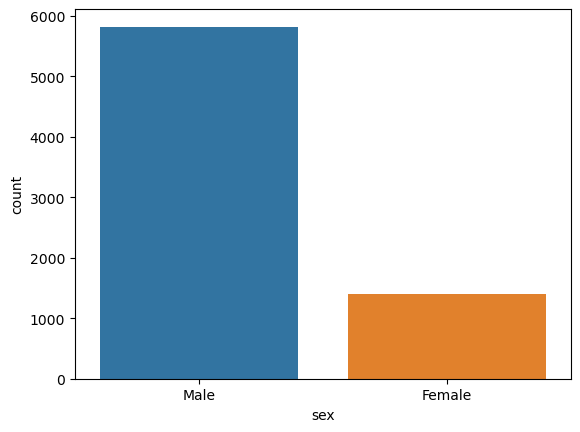

In [4]:
# Challenge 4
sns.countplot(x=df["sex"])

<AxesSubplot:xlabel='age_cat', ylabel='count'>

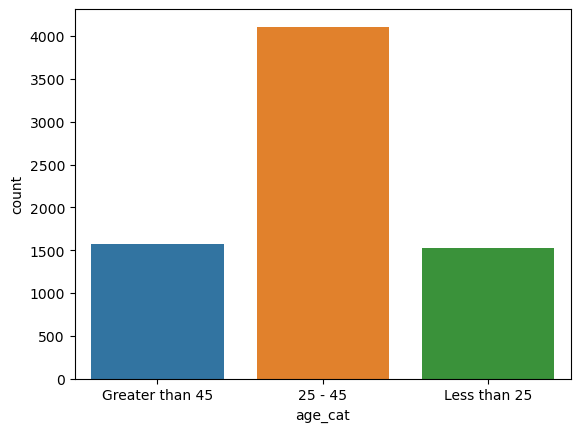

In [5]:
# Challenge 5
sns.countplot(x=df["age_cat"])

<AxesSubplot:xlabel='age', ylabel='Count'>

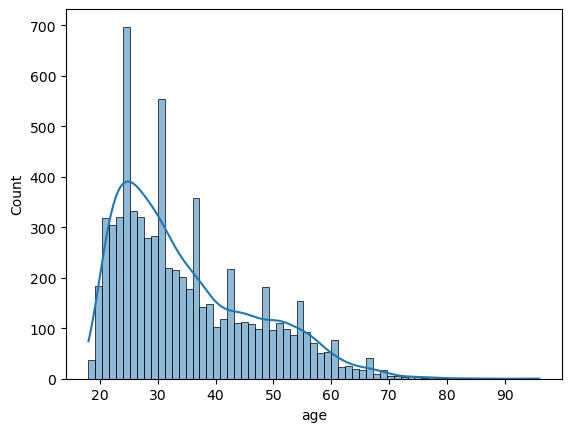

In [6]:
#Challenge 6
sns.histplot(data=df, x="age", kde=True, bins=65)

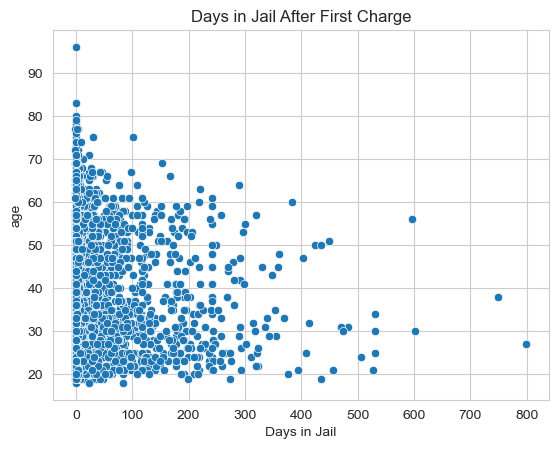

In [7]:
# Challenge 7

# Wrangle the time data
df["c_jail_in"] = pd.to_datetime(df["c_jail_in"])
df["c_jail_out"] = pd.to_datetime(df["c_jail_out"])
df["total_time_jail"] = (df["c_jail_out"] - df["c_jail_in"]).dt.days

# Create the visualization, with custom x axis label and title
sns.set_style("whitegrid")
sns.scatterplot(data=df, x="total_time_jail", y="age")
ax = plt.gca()
ax.set_xlabel("Days in Jail")
ax.set_title("Days in Jail After First Charge")
plt.show()

In [8]:
# Challenge 8 - Part 1
unique_values = df['race'].unique()
unique_values

array(['Other', 'African-American', 'Caucasian', 'Hispanic',
       'Native American', 'Asian'], dtype=object)

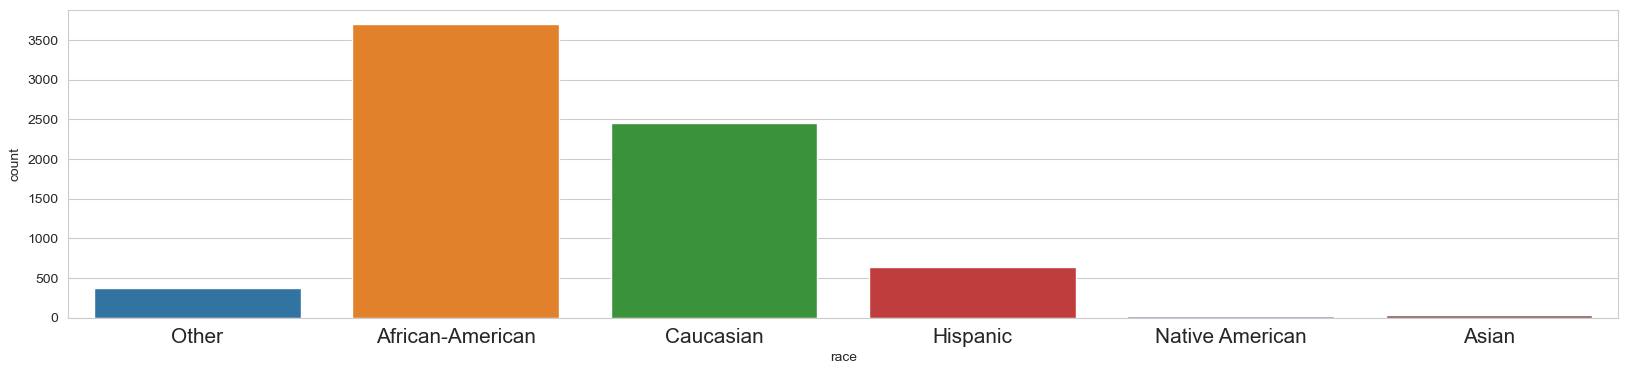

In [9]:
# Challenge 8 - Part 2
count = df['race'].value_counts()["Caucasian"]
count
plt.figure(figsize=(20, 4))
sns.countplot(x=df["race"])
plt.xticks(fontsize=15)
plt.show()

<AxesSubplot:xlabel='decile_score', ylabel='Count'>

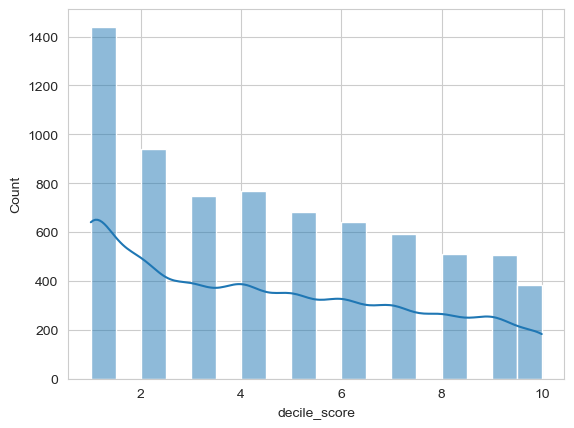

In [23]:
sns.histplot(data=df, x="decile_score", kde=True)

In [26]:
for i in range(1, 11):
    print(str(i), len(df[df.loc[:, "decile_score"] == i]))

1 1440
2 941
3 747
4 769
5 681
6 641
7 592
8 512
9 508
10 383


<AxesSubplot:xlabel='decile_score', ylabel='count'>

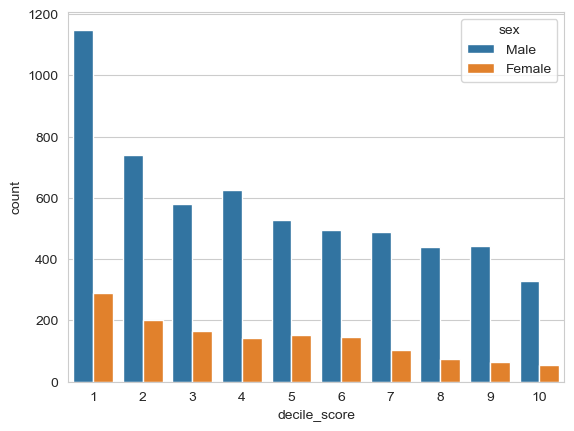

In [24]:
sns.countplot(data=df, hue="sex", x="decile_score")

In [38]:
for i in range(1, 11):
    for x in range(2):
        if x==0:
            print(str(i),"Male", len(df[df.loc[:, "decile_score"] == i][df.loc[:, "sex"]== "Male"]))
        else:
            print(str(i),"Female", len(df[df.loc[:, "decile_score"] == i][df.loc[:, "sex"]== "Female"]))
    print()

1 Male 1149
1 Female 291

2 Male 739
2 Female 202

3 Male 580
3 Female 167

4 Male 625
4 Female 144

5 Male 529
5 Female 152

6 Male 496
6 Female 145

7 Male 488
7 Female 104

8 Male 439
8 Female 73

9 Male 444
9 Female 64

10 Male 330
10 Female 53



C:\Users\greyes11\AppData\Local\Temp\ipykernel_14156\4099791376.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(str(i),"Male", len(df[df.loc[:, "decile_score"] == i][df.loc[:, "sex"]== "Male"]))
C:\Users\greyes11\AppData\Local\Temp\ipykernel_14156\4099791376.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(str(i),"Female", len(df[df.loc[:, "decile_score"] == i][df.loc[:, "sex"]== "Female"]))


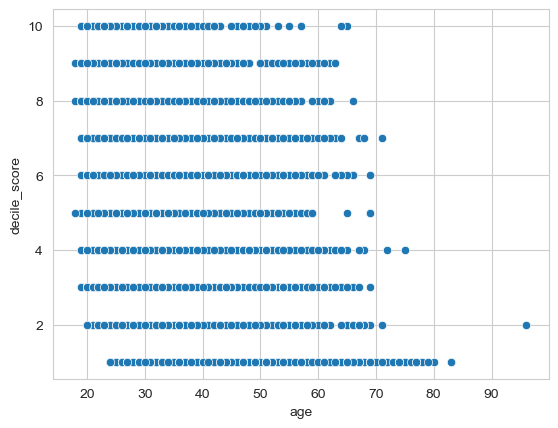

In [41]:
sns.set_style("whitegrid")
sns.scatterplot(data=df, x="age", y="decile_score")
ax = plt.gca()
plt.show()

<AxesSubplot:xlabel='decile_score', ylabel='age'>

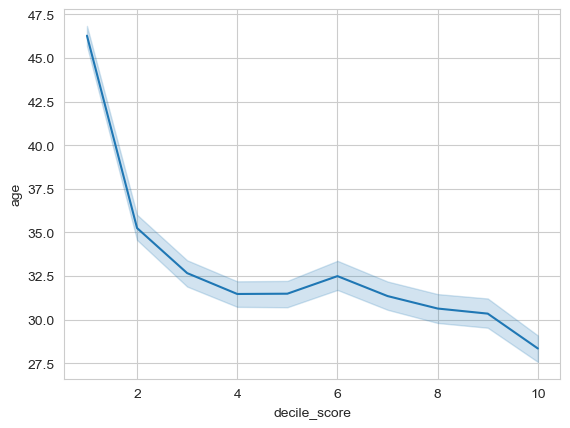

In [42]:
sns.lineplot(data=df, x="decile_score", y="age")

<AxesSubplot:xlabel='age', ylabel='decile_score'>

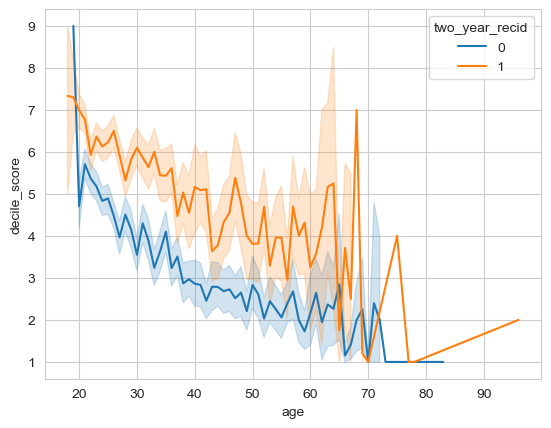

In [46]:
sns.lineplot(data=df, y="decile_score", x="age", hue = "two_year_recid")

<AxesSubplot:xlabel='age', ylabel='decile_score'>

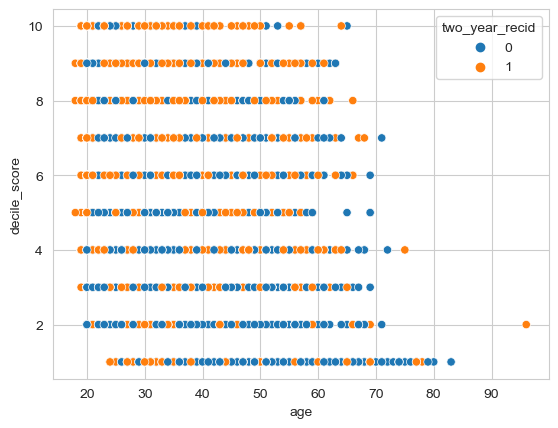

In [51]:
sns.scatterplot(data=df, x="age", y="decile_score", hue="two_year_recid")

<AxesSubplot:xlabel='priors_count', ylabel='decile_score'>

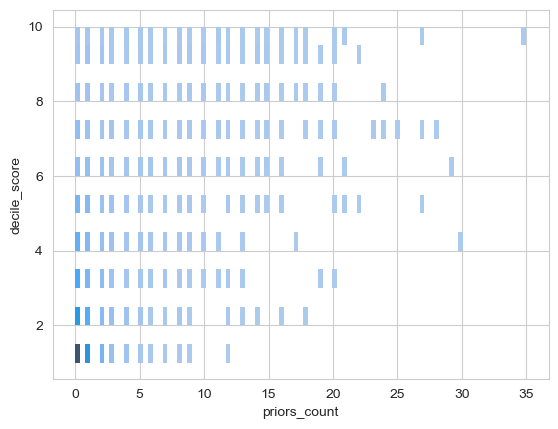

In [57]:
sns.histplot(data=df[df.loc[:, "two_year_recid"]==0], x="priors_count", y="decile_score")

<AxesSubplot:xlabel='race', ylabel='decile_score'>

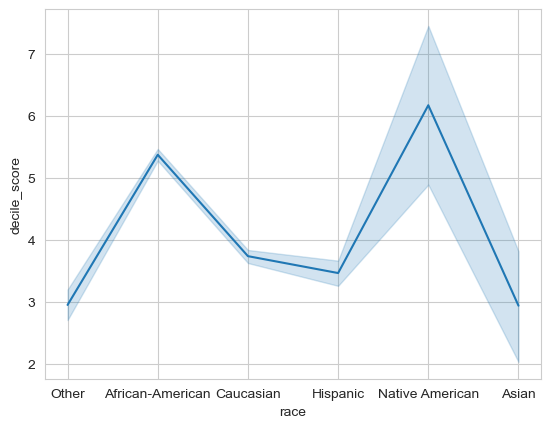

In [58]:
sns.lineplot(data=df, x="race", y="decile_score")

<AxesSubplot:xlabel='race', ylabel='decile_score'>

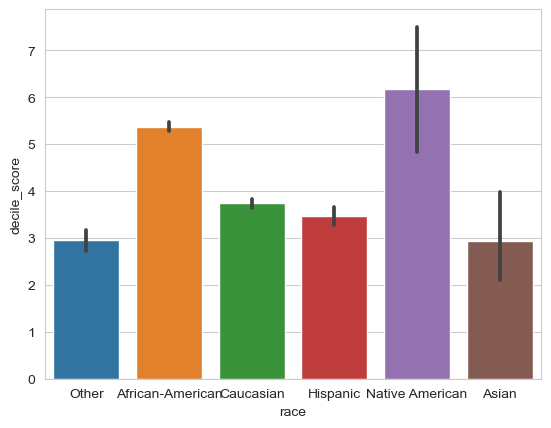

In [60]:
sns.barplot(data=df, x="race", y="decile_score")

<AxesSubplot:xlabel='decile_score', ylabel='count'>

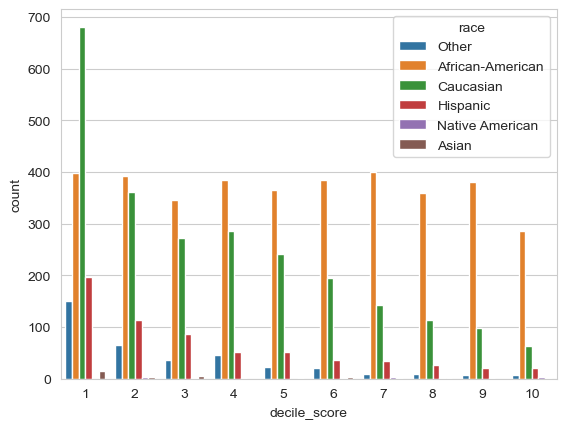

In [61]:
sns.countplot(data=df, x="decile_score", hue="race")

<AxesSubplot:xlabel='decile_score', ylabel='total_time_jail'>

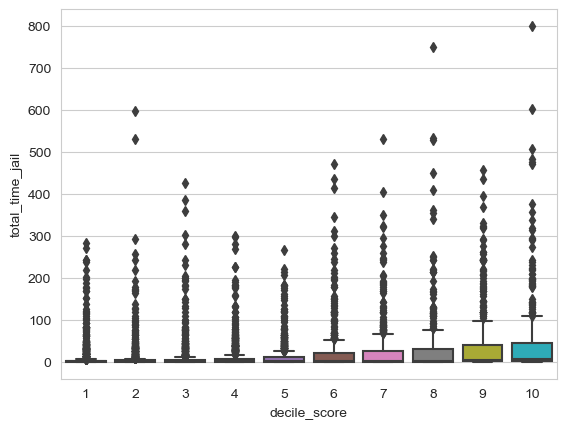

In [74]:
# Challenge 7

# Create the visualization, with custom x axis label and title
sns.boxplot(data=df, x="decile_score", y="total_time_jail")

<AxesSubplot:xlabel='decile_score', ylabel='total_time_jail'>

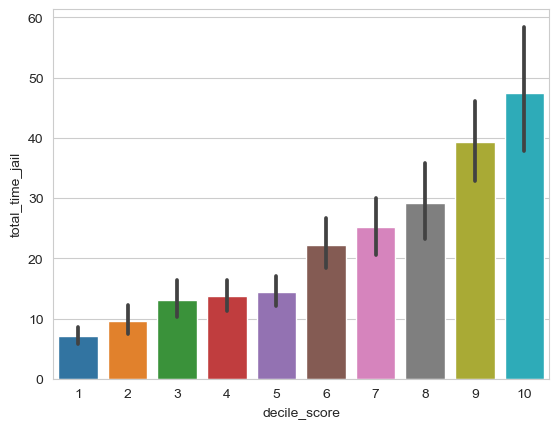

In [72]:
sns.barplot(data=df, x="decile_score", y="total_time_jail")

<AxesSubplot:xlabel='decile_score', ylabel='count'>

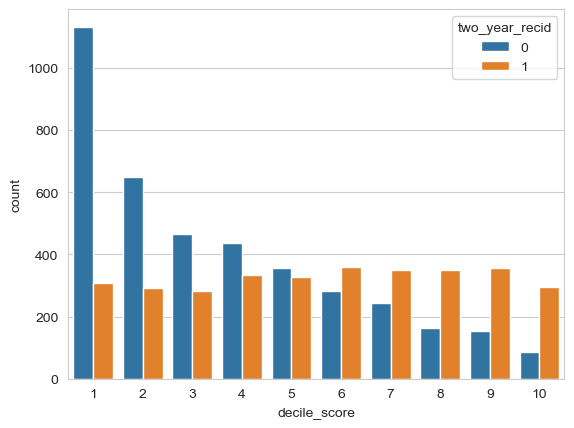

In [75]:
sns.countplot(data=df, x="decile_score", hue="two_year_recid")

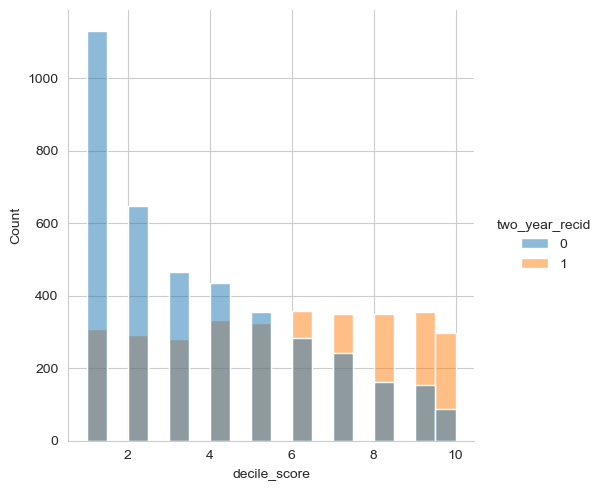

In [76]:
sns.displot(data=df, x="decile_score", hue="two_year_recid")

In [ ]:
# Challenge 17
"""
I believe that the compass scores did not correctly predict whether or not a person will recidivate. To help determine this decision, I used a distribution plot that I believe is very important to answering this question.

Looking at this distribution plot, we can see that the two year recidivate values that are 1, which means that they did recidivate, are almost plateaued across every decile score.

I believe that the most ideal and realistic trend with the recidivate distribution should be a linear upward trend. As the decile score goes higher, the more people recidivate should be.

On the other hand, the distribution shows a large amount of people who did not recidivate going in the downwards direction. I believe that this relationship that is already formed with this group is an ideal way that they should be ranked with their decile score.
 
The ideal relationship with people who did not recidivate should be as the decile score gets higher, the amount of people who don't recidivate gets lower. The trend with this group is shown pretty close to this.

So while Compas was able to accurately score people who ended up not recidivating, it did not accurately score people who did recidivate. In order for Compas to be an ideal program and able to accurately judge the events of one's life, it should be able to accurately score both groups of people (people who recidivate & not), and thus the program should not be used.

sns.displot(data=df, x="decile_score", hue="two_year_recid")
"""